In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn import linear_model
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

## Naive Decision Tree for Run vs Pass

In [5]:
constructedData = pd.read_csv('../MAIN/Combining Data/combined_data.csv')

In [6]:
categoricalFeatures = ['pff_passCoverage', 'pff_manZone']
decisionTreeData = pd.get_dummies(constructedData, columns=categoricalFeatures)

In [10]:
indicator = decisionTreeData['isDropback']
print(indicator.value_counts())

isDropback
True     9736
False    6388
Name: count, dtype: int64


0.5752377015295577


[Text(0.5, 0.875, 'x[3] <= 2.5\nentropy = 1.0\nsamples = 11286\nvalue = [5643.0, 5643.0]'),
 Text(0.25, 0.625, 'x[4] <= 10.5\nentropy = 0.991\nsamples = 8752\nvalue = [4984.333, 3979.261]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[12] <= 0.5\nentropy = 0.983\nsamples = 7999\nvalue = [4765.2, 3500.13]'),
 Text(0.0625, 0.125, 'entropy = 0.996\nsamples = 5269\nvalue = [2870.267, 2480.739]'),
 Text(0.1875, 0.125, 'entropy = 0.934\nsamples = 2730\nvalue = [1894.933, 1019.391]'),
 Text(0.375, 0.375, 'x[2] <= 3.5\nentropy = 0.898\nsamples = 753\nvalue = [219.133, 479.13]'),
 Text(0.3125, 0.125, 'entropy = 0.835\nsamples = 540\nvalue = [130.467, 361.0]'),
 Text(0.4375, 0.125, 'entropy = 0.985\nsamples = 213\nvalue = [88.667, 118.13]'),
 Text(0.75, 0.625, 'x[4] <= 1.5\nentropy = 0.86\nsamples = 2534\nvalue = [658.667, 1663.739]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[0] <= 86.16\nentropy = 0.766\nsamples = 389\nvalue = [342.0, 98.304]'),
 Text(0.5625, 0.125, 'entro

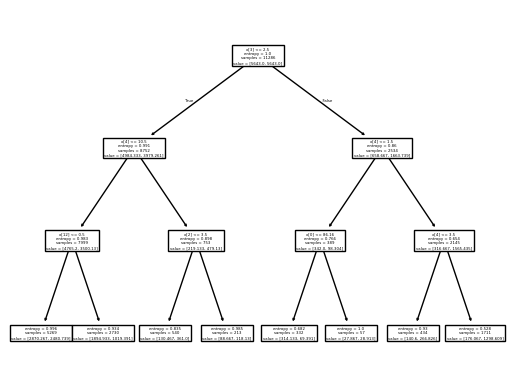

In [28]:
featureHeaders = ['totalDistanceTraveledByPossessionTeam',
                   'absoluteYardlineNumber', 'quarter', 'down', 'yardsToGo', 'pff_passCoverage_2-Man', 'pff_passCoverage_Bracket',
       'pff_passCoverage_Cover 6-Left', 'pff_passCoverage_Cover-0',
       'pff_passCoverage_Cover-1', 'pff_passCoverage_Cover-1 Double',
       'pff_passCoverage_Cover-2', 'pff_passCoverage_Cover-3',
       'pff_passCoverage_Cover-3 Cloud Left',
       'pff_passCoverage_Cover-3 Cloud Right',
       'pff_passCoverage_Cover-3 Double Cloud',
       'pff_passCoverage_Cover-3 Seam', 'pff_passCoverage_Cover-6 Right',
       'pff_passCoverage_Goal Line', 'pff_passCoverage_Miscellaneous',
       'pff_passCoverage_Prevent', 'pff_passCoverage_Quarters',
       'pff_passCoverage_Red Zone', 'pff_manZone_Man', 'pff_manZone_Other',
       'pff_manZone_Zone']
X = decisionTreeData[featureHeaders]
y = decisionTreeData['isDropback']
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)
clfObj = DecisionTreeClassifier(max_depth=3, class_weight='balanced', criterion='entropy')
clf = clfObj.fit(XTrain, yTrain)

yPred = clf.predict(XTest)
print(metrics.accuracy_score(yTest, yPred))
tree.plot_tree(clf)

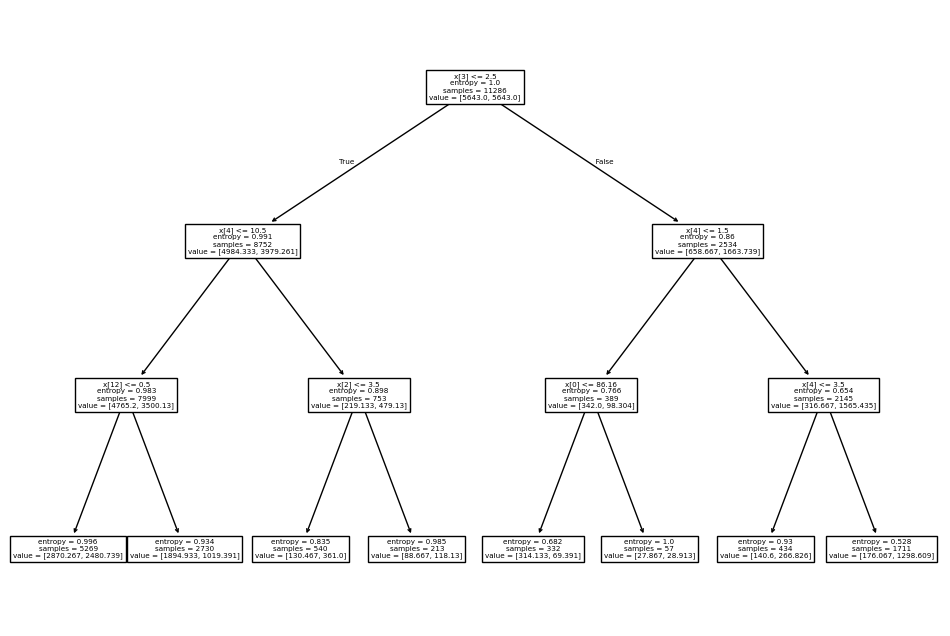

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
tree.plot_tree(clf)
plt.show()

In [23]:
cm = confusion_matrix(yTest, yPred)
print(cm)
tn, fp, fn, tp = confusion_matrix(yTest, yPred).ravel()
print(tn, fp, fn, tp)

classReport = classification_report(yTest, yPred)
print(classReport)

[[1742  191]
 [1864 1041]]
1742 191 1864 1041
              precision    recall  f1-score   support

       False       0.48      0.90      0.63      1933
        True       0.84      0.36      0.50      2905

    accuracy                           0.58      4838
   macro avg       0.66      0.63      0.57      4838
weighted avg       0.70      0.58      0.55      4838



## Naive Linear Regression for PointsAdded

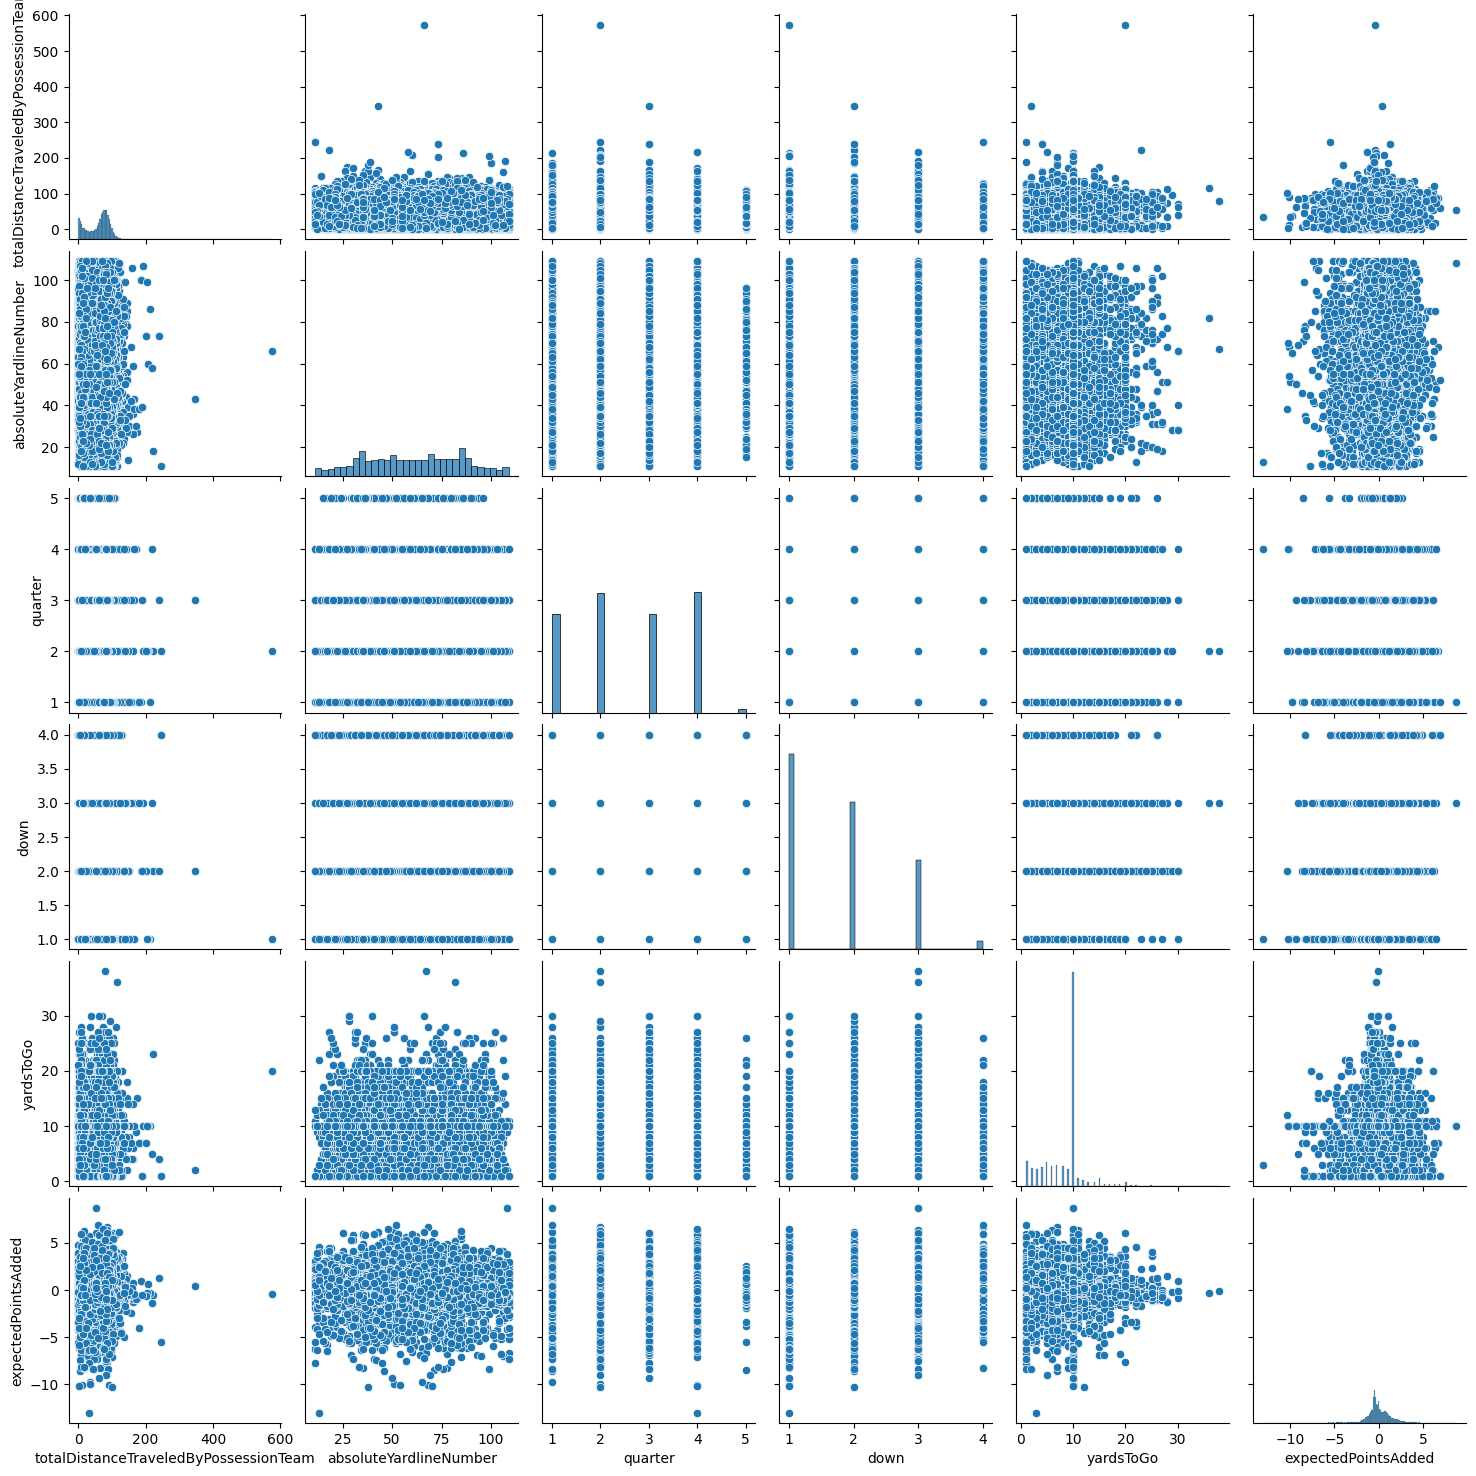

In [ ]:
linRegFeatures = ['totalDistanceTraveledByPossessionTeam', 
                  'absoluteYardlineNumber', 
                  'quarter', 'down', 'yardsToGo',
                  'expectedPointsAdded']
linRegData = constructedData[linRegFeatures]
linRegData = linRegData.dropna()
X = linRegData.drop(['expectedPointsAdded'], axis=1)
y = linRegData['expectedPointsAdded']
XTrain_linreg, XTest_linreg, yTrain_linreg, yTest_linreg = train_test_split(X, y)
sns.pairplot(linRegData)
plt.show()

In [56]:
linReg = linear_model.LinearRegression().fit(XTrain_linreg, yTrain_linreg)
print(linReg.coef_)

[-0.02100566 -0.00033075 -0.00497037 -0.00783362 -0.01589003]


In [57]:
predicted_linreg = linReg.predict(XTest_linreg)
print(mean_squared_error(yTest_linreg, predicted_linreg))
print(r2_score(yTest_linreg, predicted_linreg))

0.004039396548008139
0.0007579595558071528


## Naive Random Forest for Expected Points Added

In [71]:
xpa_Data_Cols = ['totalDistanceTraveledByPossessionTeam', 
                  'absoluteYardlineNumber', 
                  'quarter', 'down', 'yardsToGo',
                  'expectedPointsAdded']

xpa_Data = constructedData[xpa_Data_Cols]
xpa_Data = xpa_Data.dropna()
xpa_Data.loc[xpa_Data['expectedPointsAdded'] < 0, 'expectedPointsAdded'] = 0
xpa_Data.loc[xpa_Data['expectedPointsAdded'] > 0, 'expectedPointsAdded'] = 1
X_xpa = xpa_Data.drop(['expectedPointsAdded'], axis=1)
y_xpa = xpa_Data['expectedPointsAdded']
print(y_xpa.value_counts())
XTrain_xpa, XTest_xpa, yTrain_xpa, yTest_xpa = train_test_split(X_xpa, y_xpa)

expectedPointsAdded
0.0    9266
1.0    6853
Name: count, dtype: int64


In [73]:
xpa_randForest = RandomForestClassifier().fit(XTrain_xpa, yTrain_xpa)
predict_xpa = xpa_randForest.predict(XTest_xpa)
print(classification_report(yTest_xpa, predict_xpa))

              precision    recall  f1-score   support

         0.0       0.59      0.68      0.63      2267
         1.0       0.48      0.39      0.43      1763

    accuracy                           0.55      4030
   macro avg       0.54      0.53      0.53      4030
weighted avg       0.54      0.55      0.54      4030

